In [1]:
# Uploading the packages we'll need

import pandas as pd
import numpy as np
import os
import json
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Activation

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading in the json file

with open('./ShipDetection/shipsnet.json') as data_file:
    dataset = json.load(data_file)

In [3]:
# Turning the json information into a numpy array and then assign it as our X and y values

X = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

In [4]:
# Checking the amount of ship and not a ship labels for the images

pd.Series(y).value_counts()

0    3000
1    1000
dtype: int64

In [5]:
# Identifying the class names

class_names = ['Not A Ship', 'Ship']

In [6]:
# Each item in X_reshaped will now be 3 lists, each list will be the RBG values for each pixel for the length and the width 
# of the image

X_reshaped = X.reshape([-1, 3, 80, 80])

X_reshaped.shape

(4000, 3, 80, 80)

In [7]:
# We need to change the order of the dimensions to get the correct format to plot the images 

X_reshaped = X.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])

X_reshaped.shape

(4000, 80, 80, 3)

In [8]:
# Converts the data for y to a binary class matrix

y_reshaped = tf.keras.utils.to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

In [9]:
# Normalizing the X values

X_reshaped = X_reshaped / 255

In [10]:
# Doing the initial train/test split on the reshaped values

X_train_full, X_test, y_train_full, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.20, random_state=42)

# Creating the validation set

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [11]:
# Using a 5x5 kernel and a pooling size of 3x3 at the start of the sequence

# Increasing the number of nodes in the first convolution layer 

# Increasing the pool size in the first pool layer

model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3), input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

2022-03-11 22:48:53.731660: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-11 22:48:53.732606: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


In [12]:
# Training the model

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

2022-03-11 22:49:10.927009: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/70


2022-03-11 22:49:11.293961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


74/75 [============================>.] - ETA: 0s - loss: 0.3580 - accuracy: 0.8514

2022-03-11 22:49:18.393841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


75/75 [==============================] - 8s 60ms/step - loss: 0.3562 - accuracy: 0.8517 - val_loss: 0.2208 - val_accuracy: 0.9125
Epoch 2/70
75/75 [==============================] - 4s 58ms/step - loss: 0.2234 - accuracy: 0.9104 - val_loss: 0.1881 - val_accuracy: 0.9237
Epoch 3/70
75/75 [==============================] - 5s 65ms/step - loss: 0.1651 - accuracy: 0.9308 - val_loss: 0.2052 - val_accuracy: 0.9300
Epoch 4/70
75/75 [==============================] - 5s 61ms/step - loss: 0.1388 - accuracy: 0.9450 - val_loss: 0.1290 - val_accuracy: 0.9512
Epoch 5/70
75/75 [==============================] - 5s 62ms/step - loss: 0.1120 - accuracy: 0.9596 - val_loss: 0.1152 - val_accuracy: 0.9525
Epoch 6/70
75/75 [==============================] - 5s 64ms/step - loss: 0.1063 - accuracy: 0.9629 - val_loss: 0.1516 - val_accuracy: 0.9462
Epoch 7/70
75/75 [==============================] - 5s 60ms/step - loss: 0.0927 - accuracy: 0.9629 - val_loss: 0.0997 - val_accuracy: 0.9712
Epoch 8/70
75/75 [======

75/75 [==============================] - 4s 54ms/step - loss: 7.4232e-06 - accuracy: 1.0000 - val_loss: 0.1526 - val_accuracy: 0.9762
Epoch 59/70
75/75 [==============================] - 4s 54ms/step - loss: 7.0963e-06 - accuracy: 1.0000 - val_loss: 0.1549 - val_accuracy: 0.9762
Epoch 60/70
75/75 [==============================] - 4s 54ms/step - loss: 6.5895e-06 - accuracy: 1.0000 - val_loss: 0.1536 - val_accuracy: 0.9762
Epoch 61/70
75/75 [==============================] - 4s 54ms/step - loss: 6.1038e-06 - accuracy: 1.0000 - val_loss: 0.1556 - val_accuracy: 0.9762
Epoch 62/70
75/75 [==============================] - 4s 54ms/step - loss: 5.8930e-06 - accuracy: 1.0000 - val_loss: 0.1570 - val_accuracy: 0.9762
Epoch 63/70
75/75 [==============================] - 4s 54ms/step - loss: 5.3994e-06 - accuracy: 1.0000 - val_loss: 0.1574 - val_accuracy: 0.9762
Epoch 64/70
75/75 [==============================] - 4s 54ms/step - loss: 5.0860e-06 - accuracy: 1.0000 - val_loss: 0.1593 - val_accurac

In [13]:
# Finding our final accuracy on the test set

model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 14ms/step - loss: 0.1661 - accuracy: 0.9862


[0.16610026359558105, 0.9862499833106995]

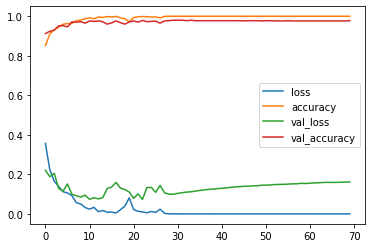

In [14]:
# Plotting the loss and accuracy

pd.DataFrame(history.history).plot();